In [ ]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC

In [ ]:
#2
from google.colab import files
uploaded = files.upload()
kidney_data = pd.read_csv("1.csv")
kidney_data.head()

Saving 1.csv to 1.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:

pd.set_option('display.max_columns',30)
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
kidney_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


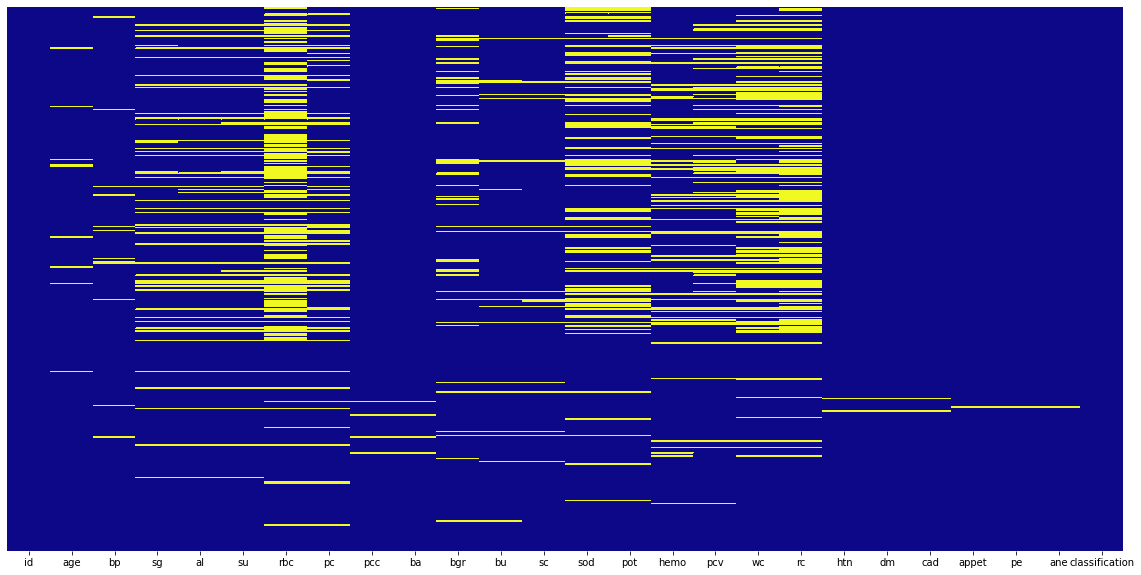

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(kidney_data.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [ ]:
kidney_data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
null_cols = kidney_data.columns[kidney_data.isnull().any()]


In [ ]:
for cols in kidney_data.select_dtypes("object"):
    kidney_data[cols] = kidney_data[cols].astype("category")

In [ ]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              400 non-null    int64   
 1   age             391 non-null    float64 
 2   bp              388 non-null    float64 
 3   sg              353 non-null    float64 
 4   al              354 non-null    float64 
 5   su              351 non-null    float64 
 6   rbc             248 non-null    category
 7   pc              335 non-null    category
 8   pcc             396 non-null    category
 9   ba              396 non-null    category
 10  bgr             356 non-null    float64 
 11  bu              381 non-null    float64 
 12  sc              383 non-null    float64 
 13  sod             313 non-null    float64 
 14  pot             312 non-null    float64 
 15  hemo            348 non-null    float64 
 16  pcv             330 non-null    category
 17  wc              

In [ ]:
cat_cols = []
for cols in kidney_data.select_dtypes("category"):
    cat_cols.append(cols)

In [ ]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
value_count_lst = []
for col in kidney_data.select_dtypes("category"):
    value_count_lst.append(kidney_data[col].value_counts())

In [ ]:
value_count_lst

[normal      201
 abnormal     47
 Name: rbc, dtype: int64, normal      259
 abnormal     76
 Name: pc, dtype: int64, notpresent    354
 present        42
 Name: pcc, dtype: int64, notpresent    374
 present        22
 Name: ba, dtype: int64, 52      21
 41      21
 44      19
 48      19
 40      16
 43      14
 45      13
 42      13
 28      12
 50      12
 36      12
 33      12
 32      12
 37      11
 34      11
 29       9
 46       9
 30       9
 35       9
 31       8
 24       7
 39       7
 26       6
 38       5
 51       4
 54       4
 47       4
 53       4
 49       4
 27       3
 22       3
 25       3
 19       2
 23       2
 \t43     1
 \t?      1
 21       1
 20       1
 18       1
 17       1
 16       1
 15       1
 14       1
 9        1
 Name: pcv, dtype: int64, 9800      11
 6700      10
 9200       9
 9600       9
 7200       9
           ..
 4100       1
 4900       1
 \t8400     1
 5100       1
 9900       1
 Name: wc, Length: 92, dtype: int64, 5.2    18
 4.5

In [ ]:
de_cols = ['classification','pcv','wc','rc','dm','cad']

In [ ]:
for cols in kidney_data[de_cols]:
    kidney_data[cols] = kidney_data[cols].str.replace('\t',"")
    kidney_data[cols] = kidney_data[cols].replace("?",np.nan)
    kidney_data[cols] = kidney_data[cols].str.strip()

In [ ]:
kidney_data.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [ ]:
cat_num_cols = ["pcv","wc","rc"]
for col in kidney_data[cat_num_cols]:
    kidney_data[col] = kidney_data[col].astype("float")

In [ ]:
cat_obj_cols = ["dm","cad","classification"]
for col in kidney_data[cat_obj_cols]:
    kidney_data[col] = kidney_data[col].astype("category")

In [ ]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              400 non-null    int64   
 1   age             391 non-null    float64 
 2   bp              388 non-null    float64 
 3   sg              353 non-null    float64 
 4   al              354 non-null    float64 
 5   su              351 non-null    float64 
 6   rbc             248 non-null    category
 7   pc              335 non-null    category
 8   pcc             396 non-null    category
 9   ba              396 non-null    category
 10  bgr             356 non-null    float64 
 11  bu              381 non-null    float64 
 12  sc              383 non-null    float64 
 13  sod             313 non-null    float64 
 14  pot             312 non-null    float64 
 15  hemo            348 non-null    float64 
 16  pcv             329 non-null    float64 
 17  wc              

In [ ]:
knn_df = kidney_data.copy()

In [ ]:
cat_cols = []
for col in knn_df.select_dtypes("category"):
    cat_cols.append(col)

In [ ]:
kd_cat_df = pd.DataFrame(knn_df[cat_cols])

In [ ]:
kd_cat_df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [ ]:
num_cols = []
for col in knn_df.select_dtypes(['int64','float64']):
    num_cols.append(col)

In [ ]:
kd_num_df = pd.DataFrame(knn_df[num_cols])

In [ ]:
def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature] = np.random.choice(observed_values, number_missing, replace = True)
    return df

In [ ]:
for feature in num_cols:
    kd_num_df = pd.DataFrame(random_imputation(kd_num_df, feature))

In [ ]:
kd_cat_df[cat_cols] = kd_cat_df[cat_cols].fillna(kd_cat_df.mode().iloc[0])

kd_cat_df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [ ]:
kidney_data[num_cols] = kd_num_df
kidney_data[cat_cols] = kd_cat_df

In [ ]:
kidney_data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

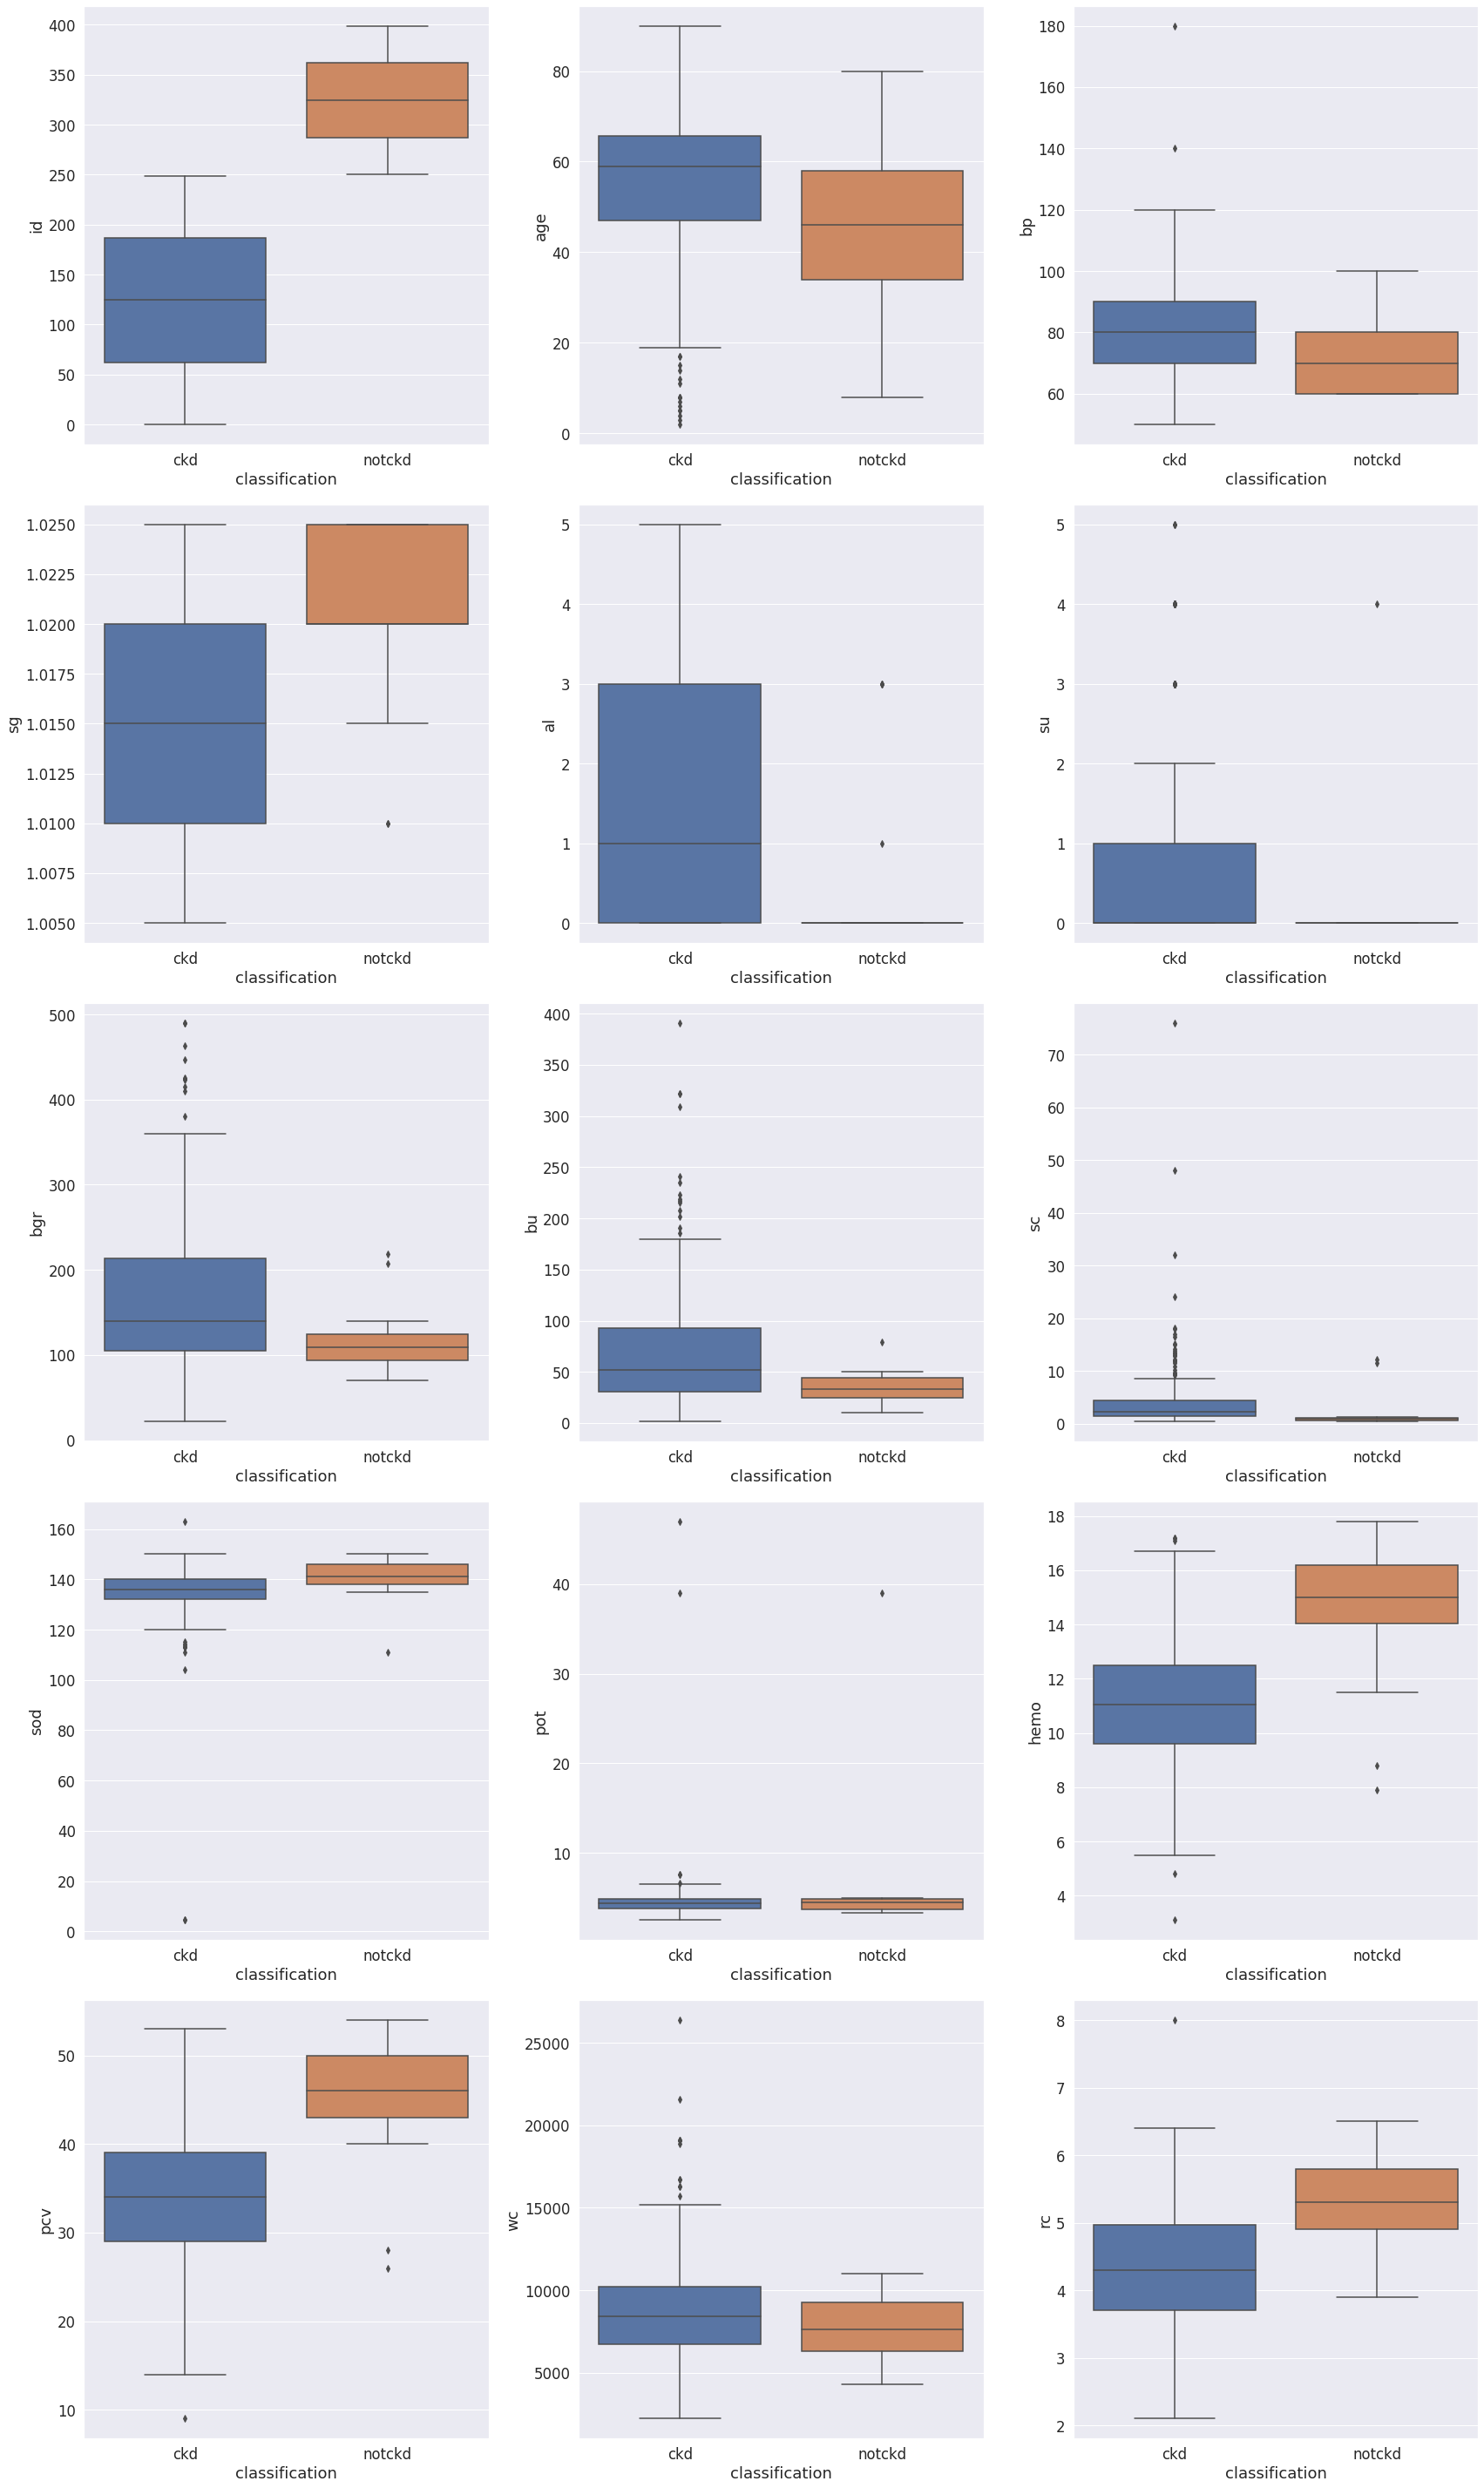

In [ ]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(24,40))
i=1
for column in kidney_data[num_cols]:
    plt.subplot(5,3,i)
    sns.boxplot(x=kidney_data.classification, y=kidney_data.loc[:,column])
    i = i + 1
    
plt.tight_layout()
plt.show()

In [ ]:
kidney_data.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

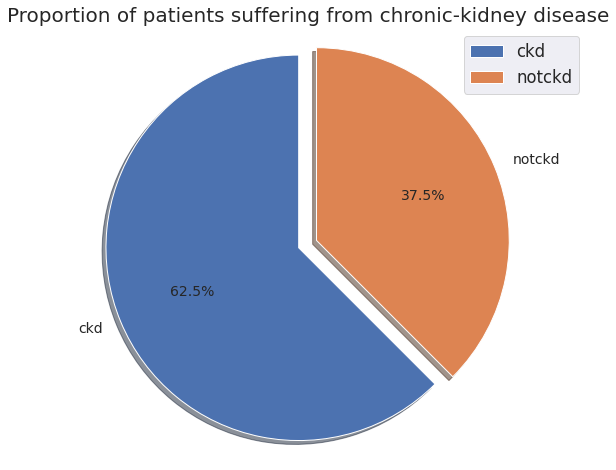

In [ ]:
labels = 'ckd','notckd'
sizes = [kidney_data.classification[kidney_data['classification']=='ckd'].count(), kidney_data.classification[kidney_data['classification']=='notckd']
         .count()]
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of patients suffering from chronic-kidney disease",size=20)
plt.show()

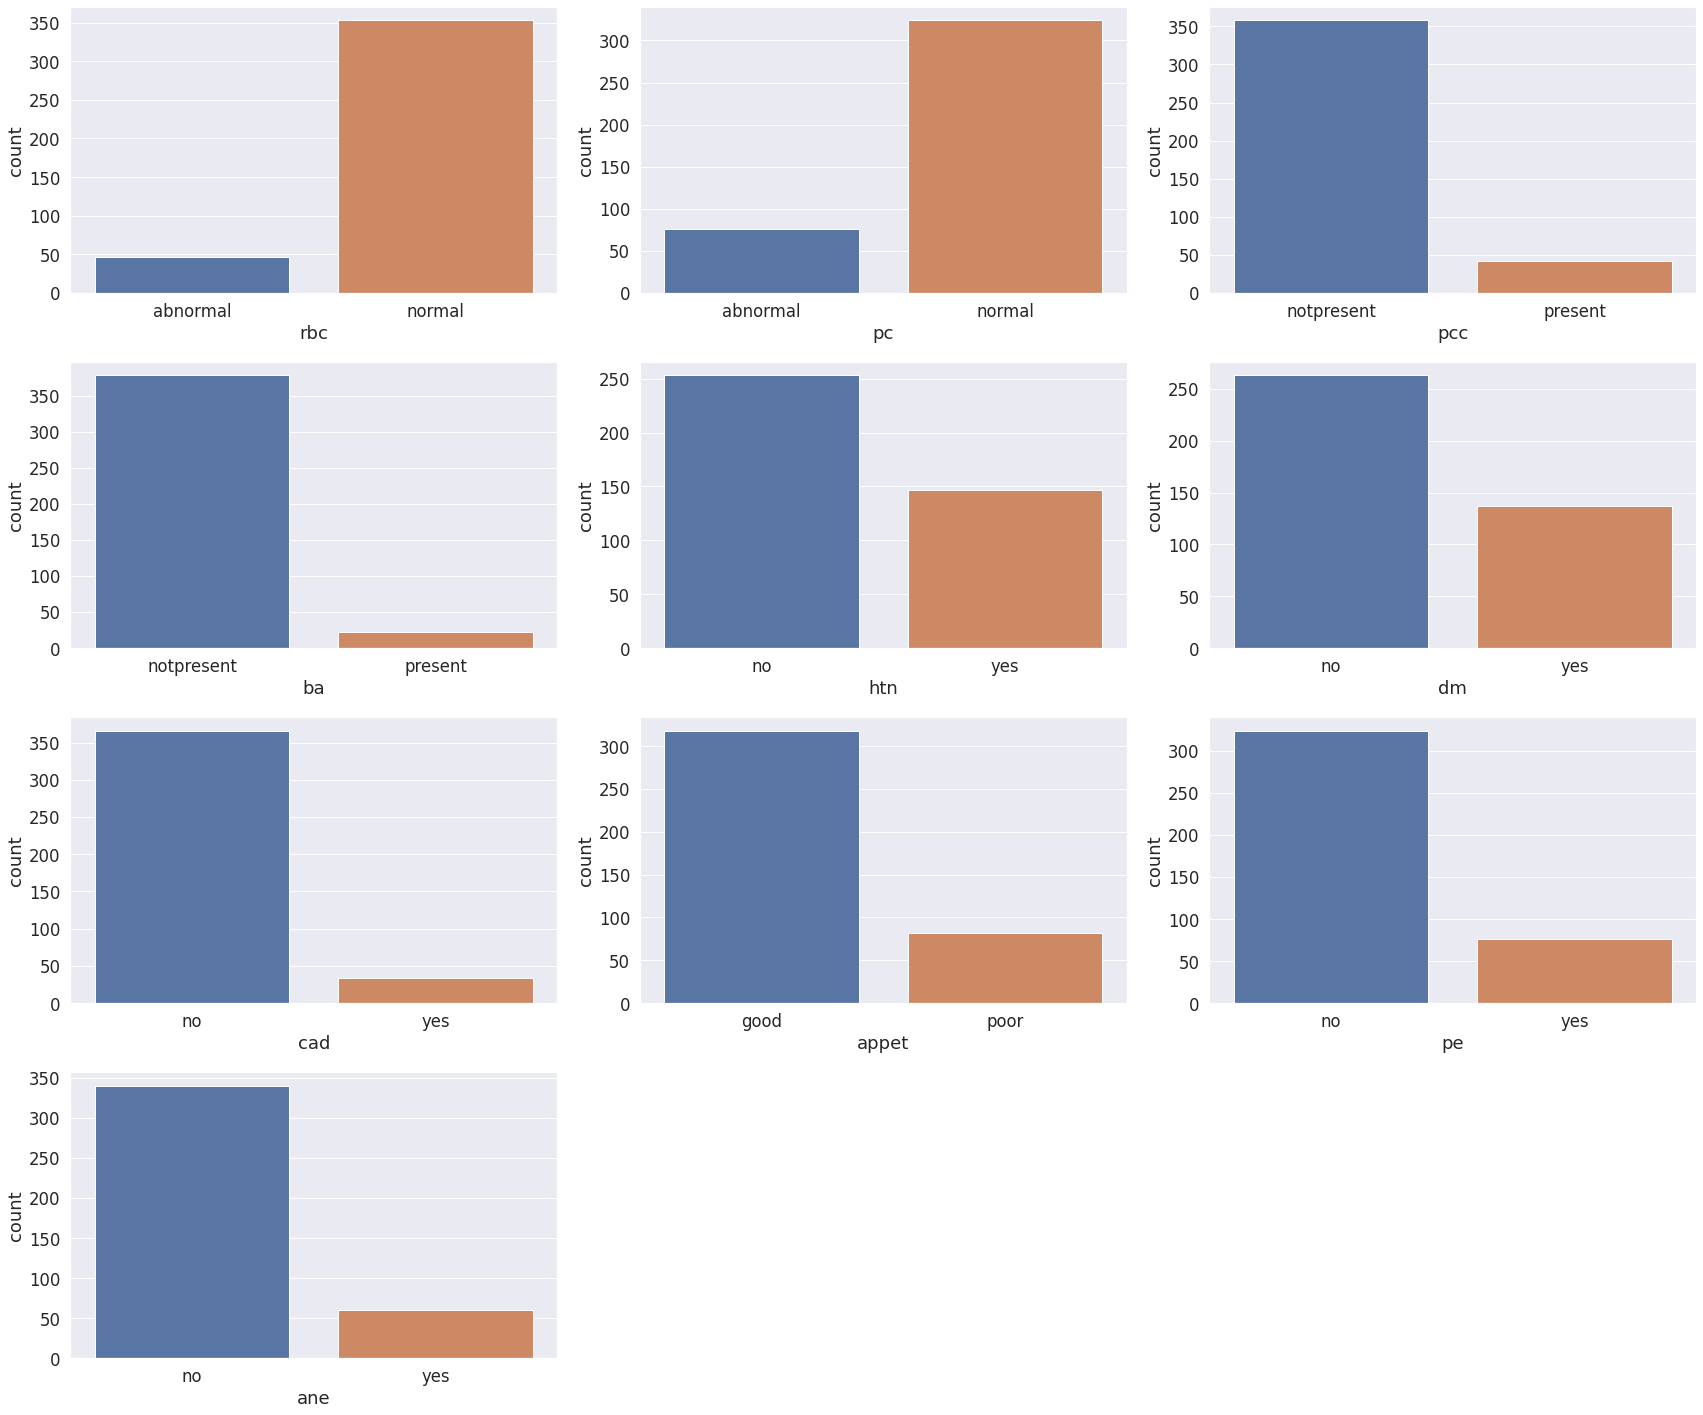

In [ ]:
sns.set(rc={'figure.figsize':(24,20)}, font_scale=1.5)

i = 1
for column in kidney_data.select_dtypes("category"):
    if column != "classification":
        plt.subplot(4,3,i)
        sns.countplot(kidney_data[column])
        i = i + 1
                   
plt.tight_layout()
plt.show()

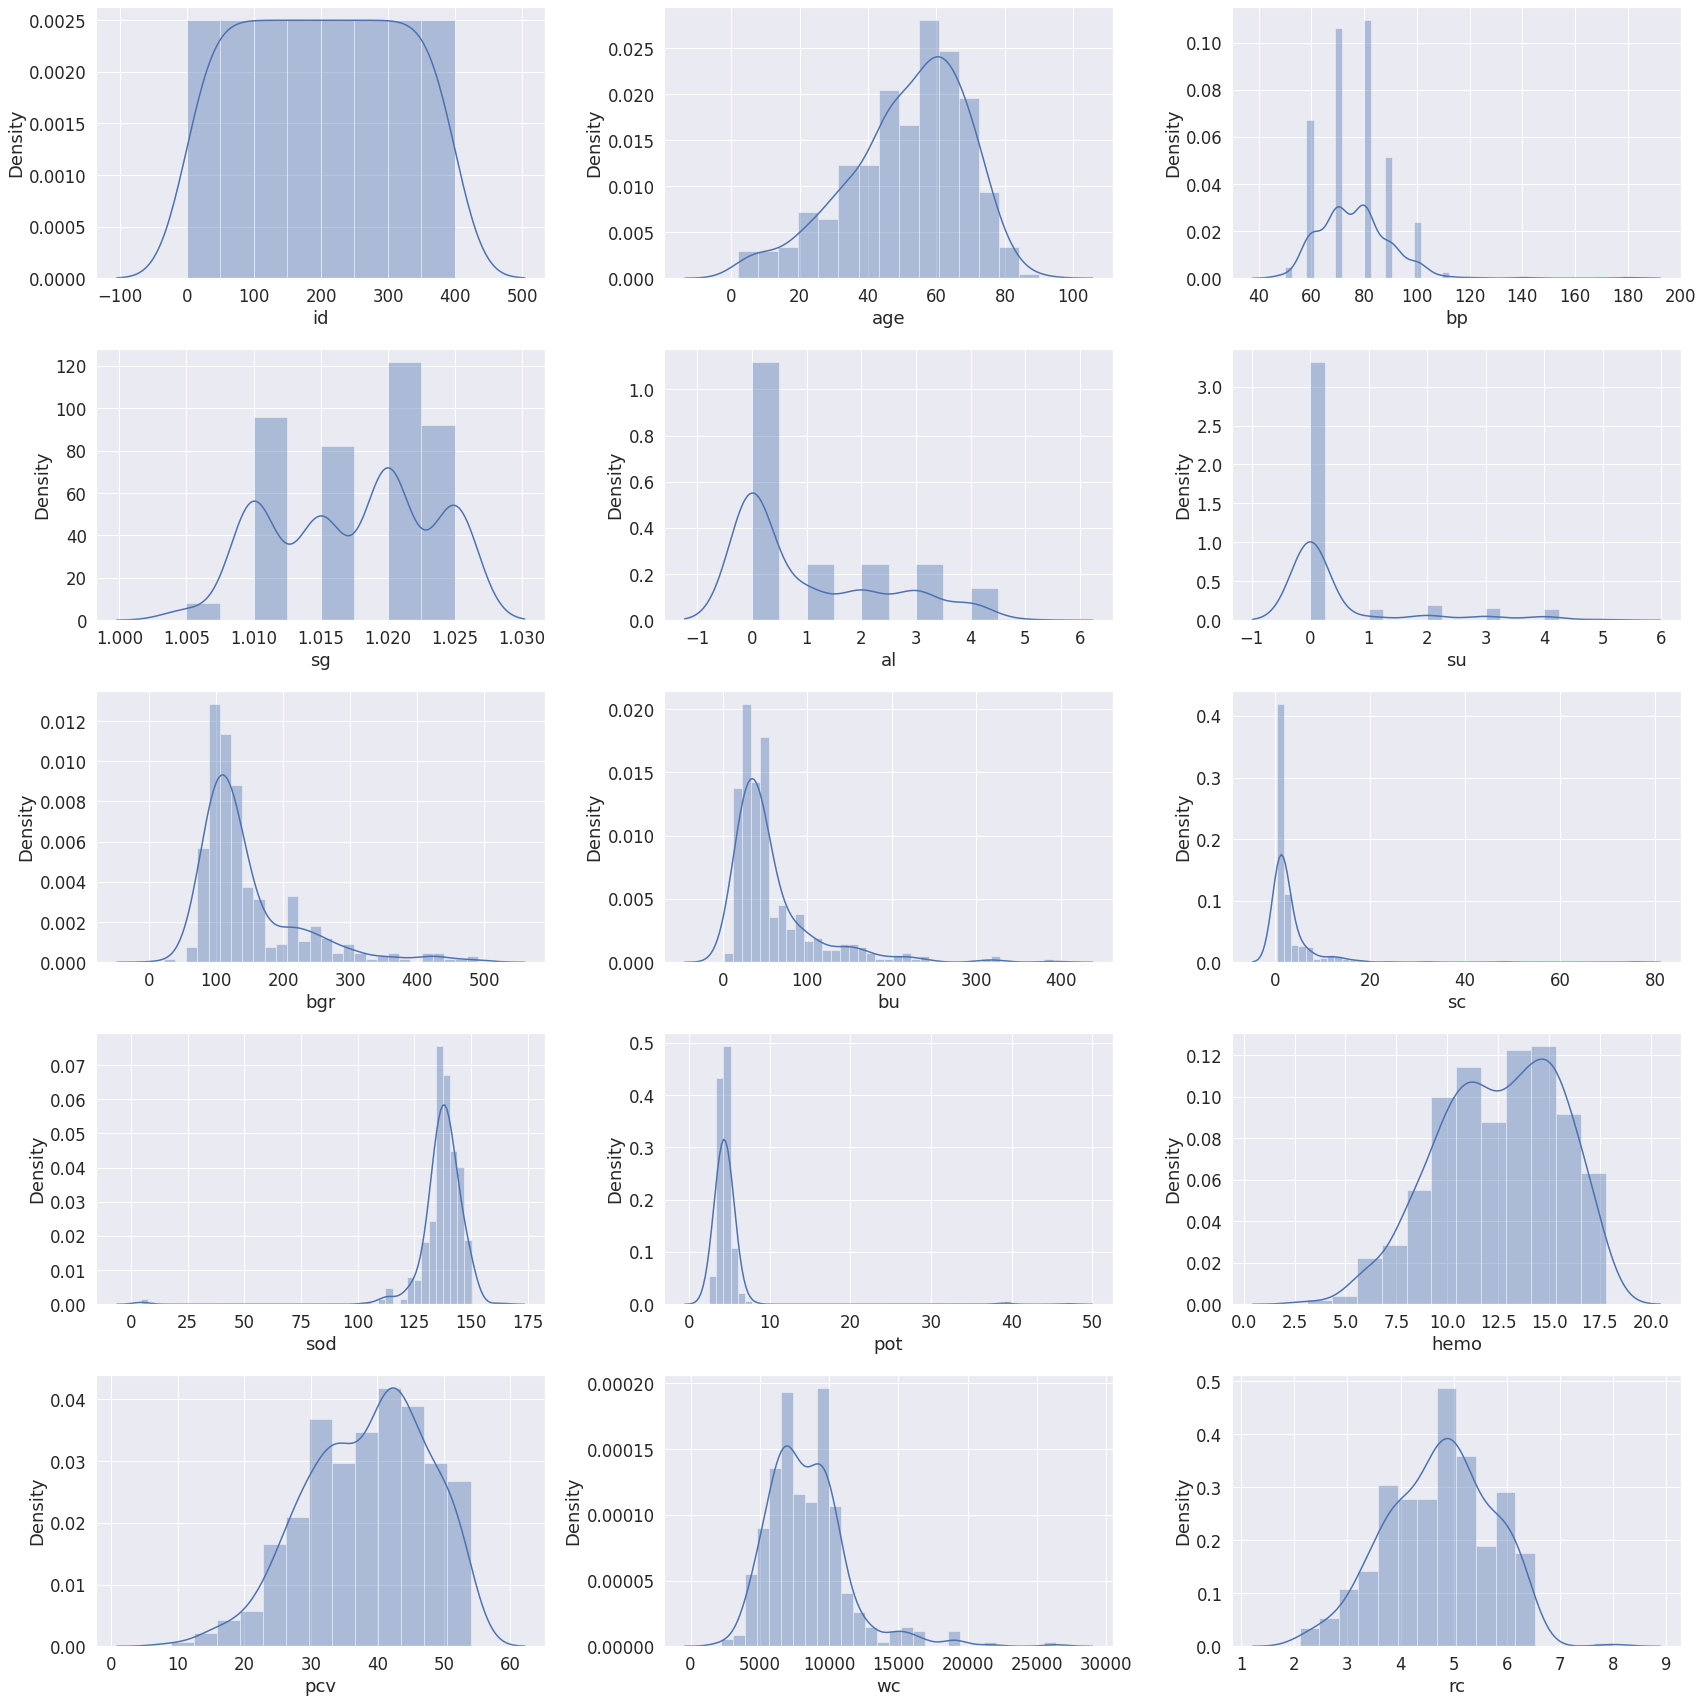

In [ ]:
sns.set(rc={'figure.figsize':(24,24)}, font_scale=1.5)
i = 1
for column in kidney_data.select_dtypes(["int64","float64"]):
    plt.subplot(5,3,i)
    sns.distplot(kidney_data[column])
    i = i + 1
          
plt.tight_layout()
plt.show()

In [ ]:
kidney_data = kidney_data.drop(["id"], axis=1)

kidney_data.shape

(400, 25)

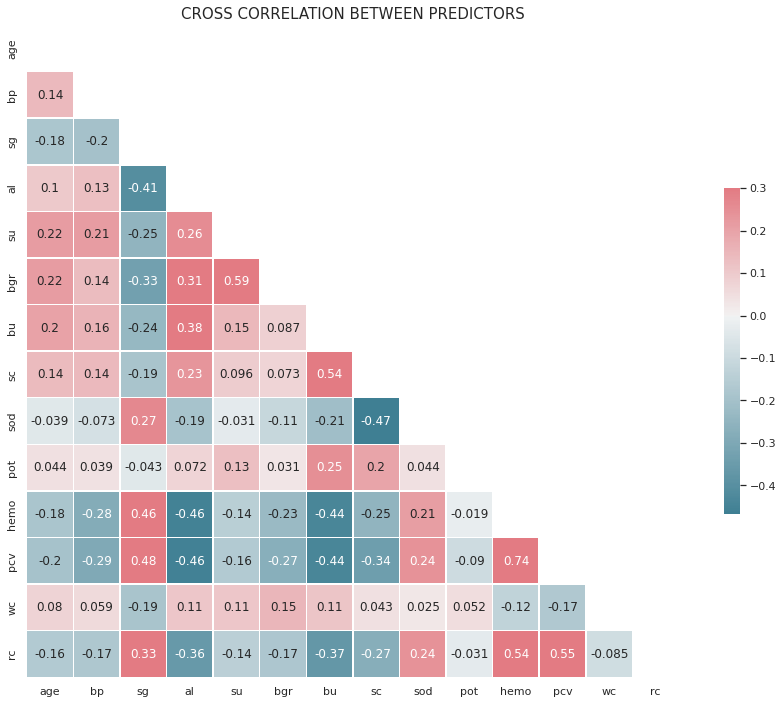

In [ ]:
sns.set(style="white")
corr = kidney_data.iloc[:, :-1].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.title("CROSS CORRELATION BETWEEN PREDICTORS", fontsize=15)
plt.show()

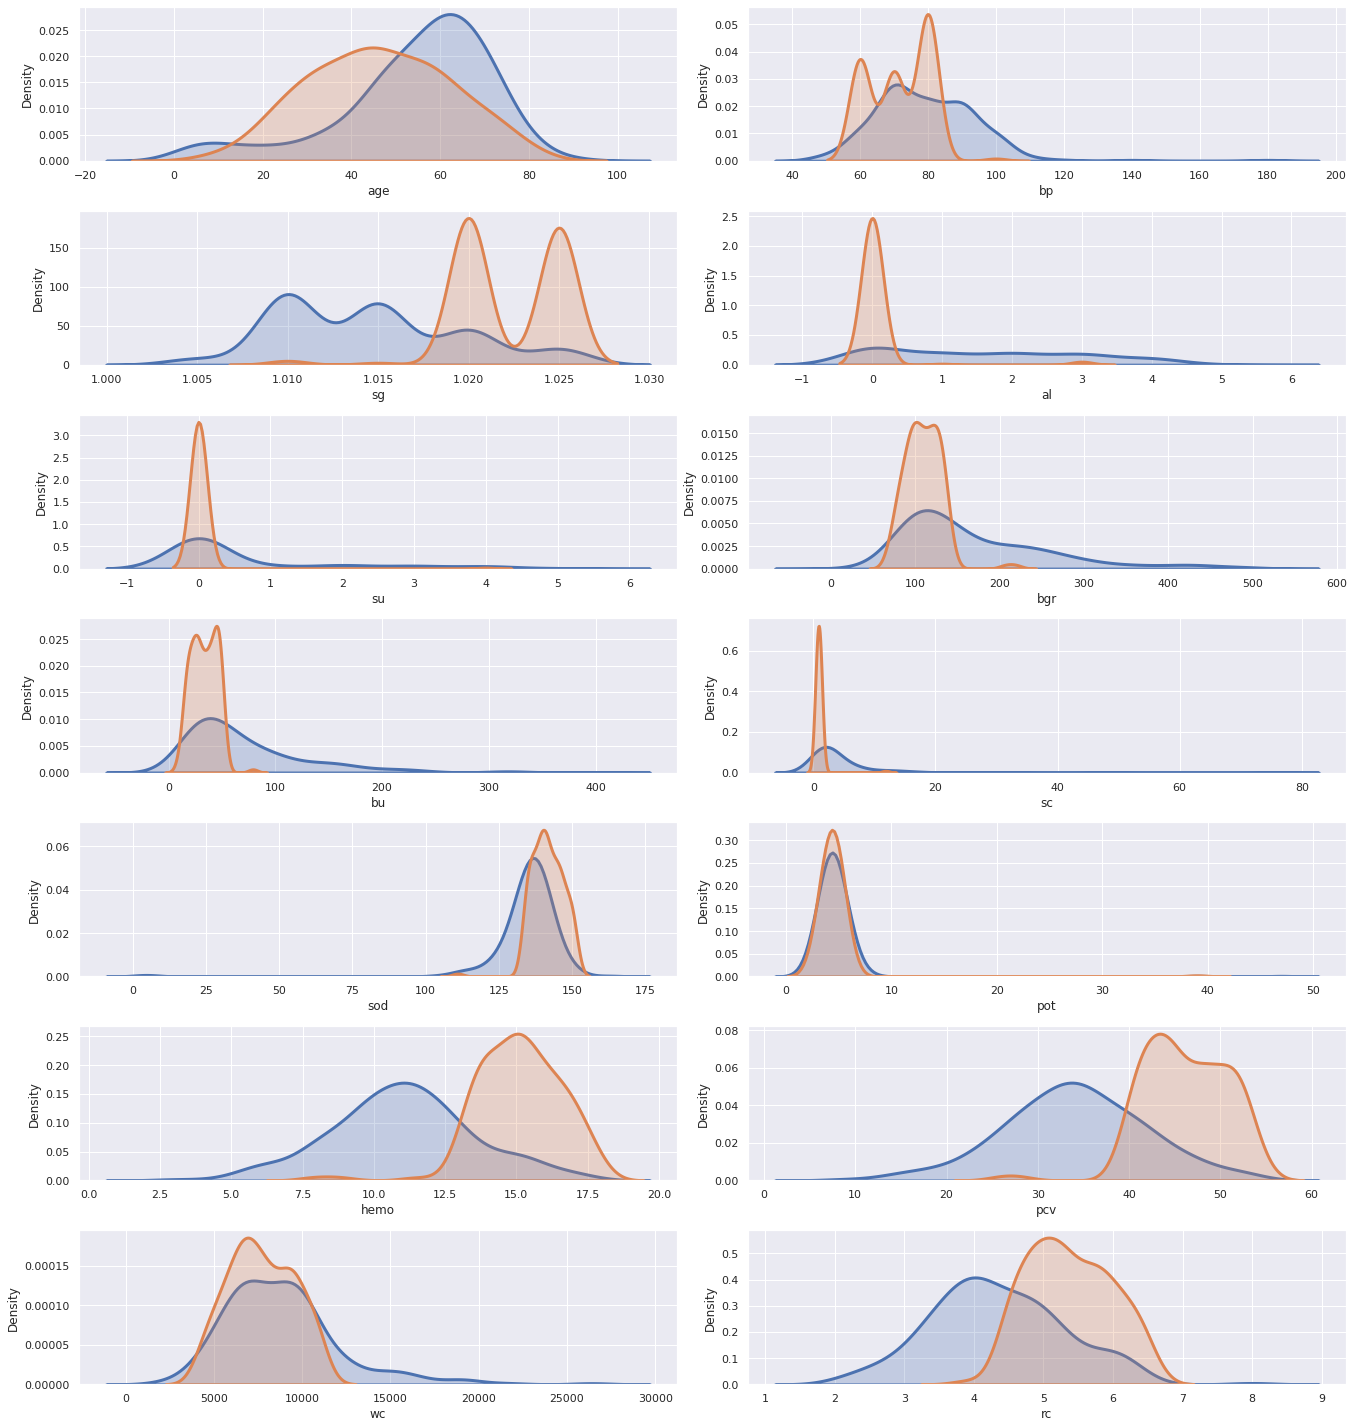

In [ ]:
sns.set()
fig = plt.figure(figsize=(19,20))
i=1
for column in kidney_data.select_dtypes(["int64","float64"]):
    plt.subplot(7,2,i)
    sns.distplot(kidney_data.loc[kidney_data.classification=='ckd',column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3}, label='ckd')
    sns.distplot(kidney_data.loc[kidney_data.classification=='notckd',column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3},label='notckd')
    i=i+1
plt.tight_layout()
plt.show()

In [ ]:
def bivariate_cat(data,col1,col2,rot):
    if col2=='classification':
        cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
        cross_tab.plot.bar(figsize=(6,5))
        plt.xlabel('{}'.format(col1))
        plt.ylabel('% of patients who are suffering from chronic-disease'.format(col1))
        plt.title('{} Vs chronic-disease-suffering'.format(col1))
        plt.xticks(rotation=rot)
        plt.show()
        return cross_tab

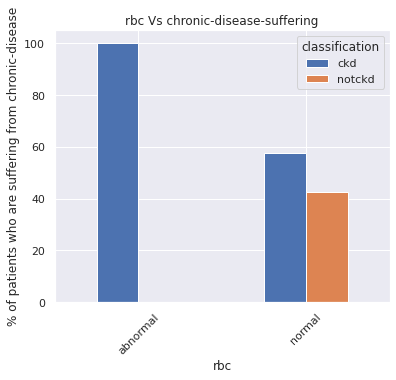

classification,ckd,notckd
rbc,,
abnormal,100.00,0.00
normal,57.51,42.49


In [ ]:
bivariate_cat(kidney_data,'rbc','classification',45)

In [ ]:
from sklearn.preprocessing import LabelEncoder
tgt_col = ['classification']
category_names = kidney_data.nunique()[kidney_data.nunique() < 20].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]
num_cols = [i for i in kidney_data.columns if i not in category_names + tgt_col]
bin_cols = kidney_data.nunique()[kidney_data.nunique()==2].keys().tolist()
multi_cols = [i for i in category_names if i not in bin_cols]
le = LabelEncoder()
for i in bin_cols:
    kidney_data[i] = le.fit_transform(kidney_data[i])
kidney_data = pd.get_dummies(data=kidney_data, columns=multi_cols)

In [ ]:
kidney_data.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,48.0,1,1,0,0,121.0,36.0,1.2,137.0,5.8,15.4,44.0,7800.0,5.2,1,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,7.0,1,1,0,0,150.0,18.0,0.8,137.0,4.5,11.3,38.0,6000.0,5.6,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,62.0,1,1,0,0,423.0,53.0,1.8,140.0,3.3,9.6,31.0,7500.0,4.3,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,48.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,51.0,1,1,0,0,106.0,26.0,1.4,139.0,3.6,11.6,35.0,7300.0,4.6,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
cont_features = []
for features in kidney_data.select_dtypes(include=['int64','float64']):
    cont_features.append(features)

In [ ]:
kd_df = kidney_data
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
kd_df[cont_features] = minmax.fit_transform(kd_df[cont_features].values)

In [ ]:
kd_df.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,0.522727,1.0,1.0,0.0,0.0,0.211538,0.088575,0.010582,0.835962,0.074157,0.836735,0.777778,0.231405,0.525424,1.0,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.056818,1.0,1.0,0.0,0.0,0.273504,0.042362,0.005291,0.835962,0.044944,0.557823,0.644444,0.157025,0.593220,0.0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.681818,1.0,1.0,0.0,0.0,0.856838,0.132221,0.018519,0.854890,0.017978,0.442177,0.488889,0.219008,0.372881,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.522727,1.0,0.0,1.0,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0.556818,1.0,1.0,0.0,0.0,0.179487,0.062901,0.013228,0.848580,0.024719,0.578231,0.577778,0.210744,0.423729,0.0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
cols = [i for i in kd_df.columns if i not in tgt_col]
X = kd_df[cols]
Y = pd.DataFrame(kd_df['classification'])

X.head()

,age,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,...,sg_1.015,sg_1.02,sg_1.025,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,0.522727,1.0,1.0,0.0,0.0,0.211538,0.088575,0.010582,0.835962,0.074157,0.836735,0.777778,0.231405,0.525424,1.0,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.056818,1.0,1.0,0.0,0.0,0.273504,0.042362,0.005291,0.835962,0.044944,0.557823,0.644444,0.157025,0.593220,0.0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.681818,1.0,1.0,0.0,0.0,0.856838,0.132221,0.018519,0.854890,0.017978,0.442177,0.488889,0.219008,0.372881,0.0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.522727,1.0,0.0,1.0,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1.0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0.556818,1.0,1.0,0.0,0.0,0.179487,0.062901,0.013228,0.848580,0.024719,0.578231,0.577778,0.210744,0.423729,0.0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in folds.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score : ")
print(accuracy_score(Y_test, y_pred))

Accuracy Score : 
0.9875


In [ ]:
confusion_matrix(Y_test, y_pred)

array([[45,  1],
       [ 0, 34]])

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        46
         1.0       0.97      1.00      0.99        34

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score :")
print(accuracy_score(Y_test, y_pred))

Accuracy Score :
0.9375


In [ ]:
confusion_matrix(Y_test, y_pred)

array([[41,  5],
       [ 0, 34]])

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        46
         1.0       0.87      1.00      0.93        34

    accuracy                           0.94        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score")
print(accuracy_score(Y_test, y_pred))

Accuracy Score
0.9875


In [ ]:
confusion_matrix(Y_test, y_pred)

array([[45,  1],
       [ 0, 34]])

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        46
         1.0       0.97      1.00      0.99        34

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
from sklearn.model_selection import cross_val_score

C_range = list(np.arange(0.1,2,0.1))
acc_score = []
for c in C_range:
    svc = SVC(kernel='linear',C=c)
    scores = cross_val_score(svc, X, Y,scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9649999999999999, 0.9625, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.9724999999999999, 0.9724999999999999, 0.9724999999999999, 0.97, 0.9674999999999999, 0.9649999999999999, 0.9649999999999999, 0.9625, 0.96, 0.9574999999999999, 0.9574999999999999]


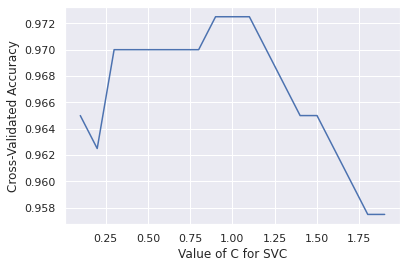

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
C_range = list(np.arange(0.1,2,0.1))
plt.plot(C_range, acc_score)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
gamma_range = [0.0001, 0.001, 0.01, 0.1]
acc_score =[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.625, 0.625, 0.9525, 0.975]


Text(0, 0.5, 'Cross validated accuracy')

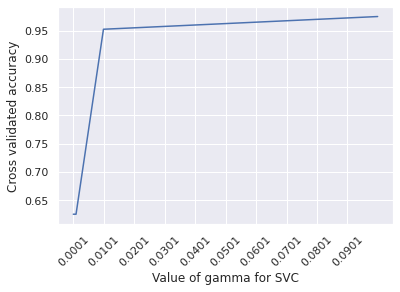

In [ ]:
plt.plot(gamma_range, acc_score)
plt.xlabel('Value of gamma for SVC')
plt.xticks(np.arange(0.0001, 0.1, 0.01), rotation=45)
plt.ylabel('Cross validated accuracy')